In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Carga de datos

In [16]:
ruta_archivo = '../ejercicios_core/data/winequality-red.csv'

df = utils.cargar_datos(ruta_archivo)

df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


2. Exploración y preprocesamiento de datos:
- Realiza una exploración inicial del dataset. Revisa los valores nulos, los rangos de las variables y cualquier valor atípico que pueda afectar el rendimiento de PCA.
- Normaliza las variables, ya que PCA es sensible a las escalas de las características. Esto asegura que las variables tengan una contribución equitativa en la formación de los componentes principales.



In [17]:
#Exploracion inicial de valores, impresion de primeras y ultimas filas
utils.exploracion_inicial(df)

Informacion del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4   

In [18]:
utils.identificar_valores_faltantes(df)

Valores faltantes en el dataset


,datos sin NAs en q,Na en q,Na en %
fixed acidity,1599,0,0.0
volatile acidity,1599,0,0.0
citric acid,1599,0,0.0
residual sugar,1599,0,0.0
chlorides,1599,0,0.0
free sulfur dioxide,1599,0,0.0
total sulfur dioxide,1599,0,0.0
density,1599,0,0.0
pH,1599,0,0.0
sulphates,1599,0,0.0


In [19]:
utils.estadisticas_descriptivas(df)

Estadisticas del dataset
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000     

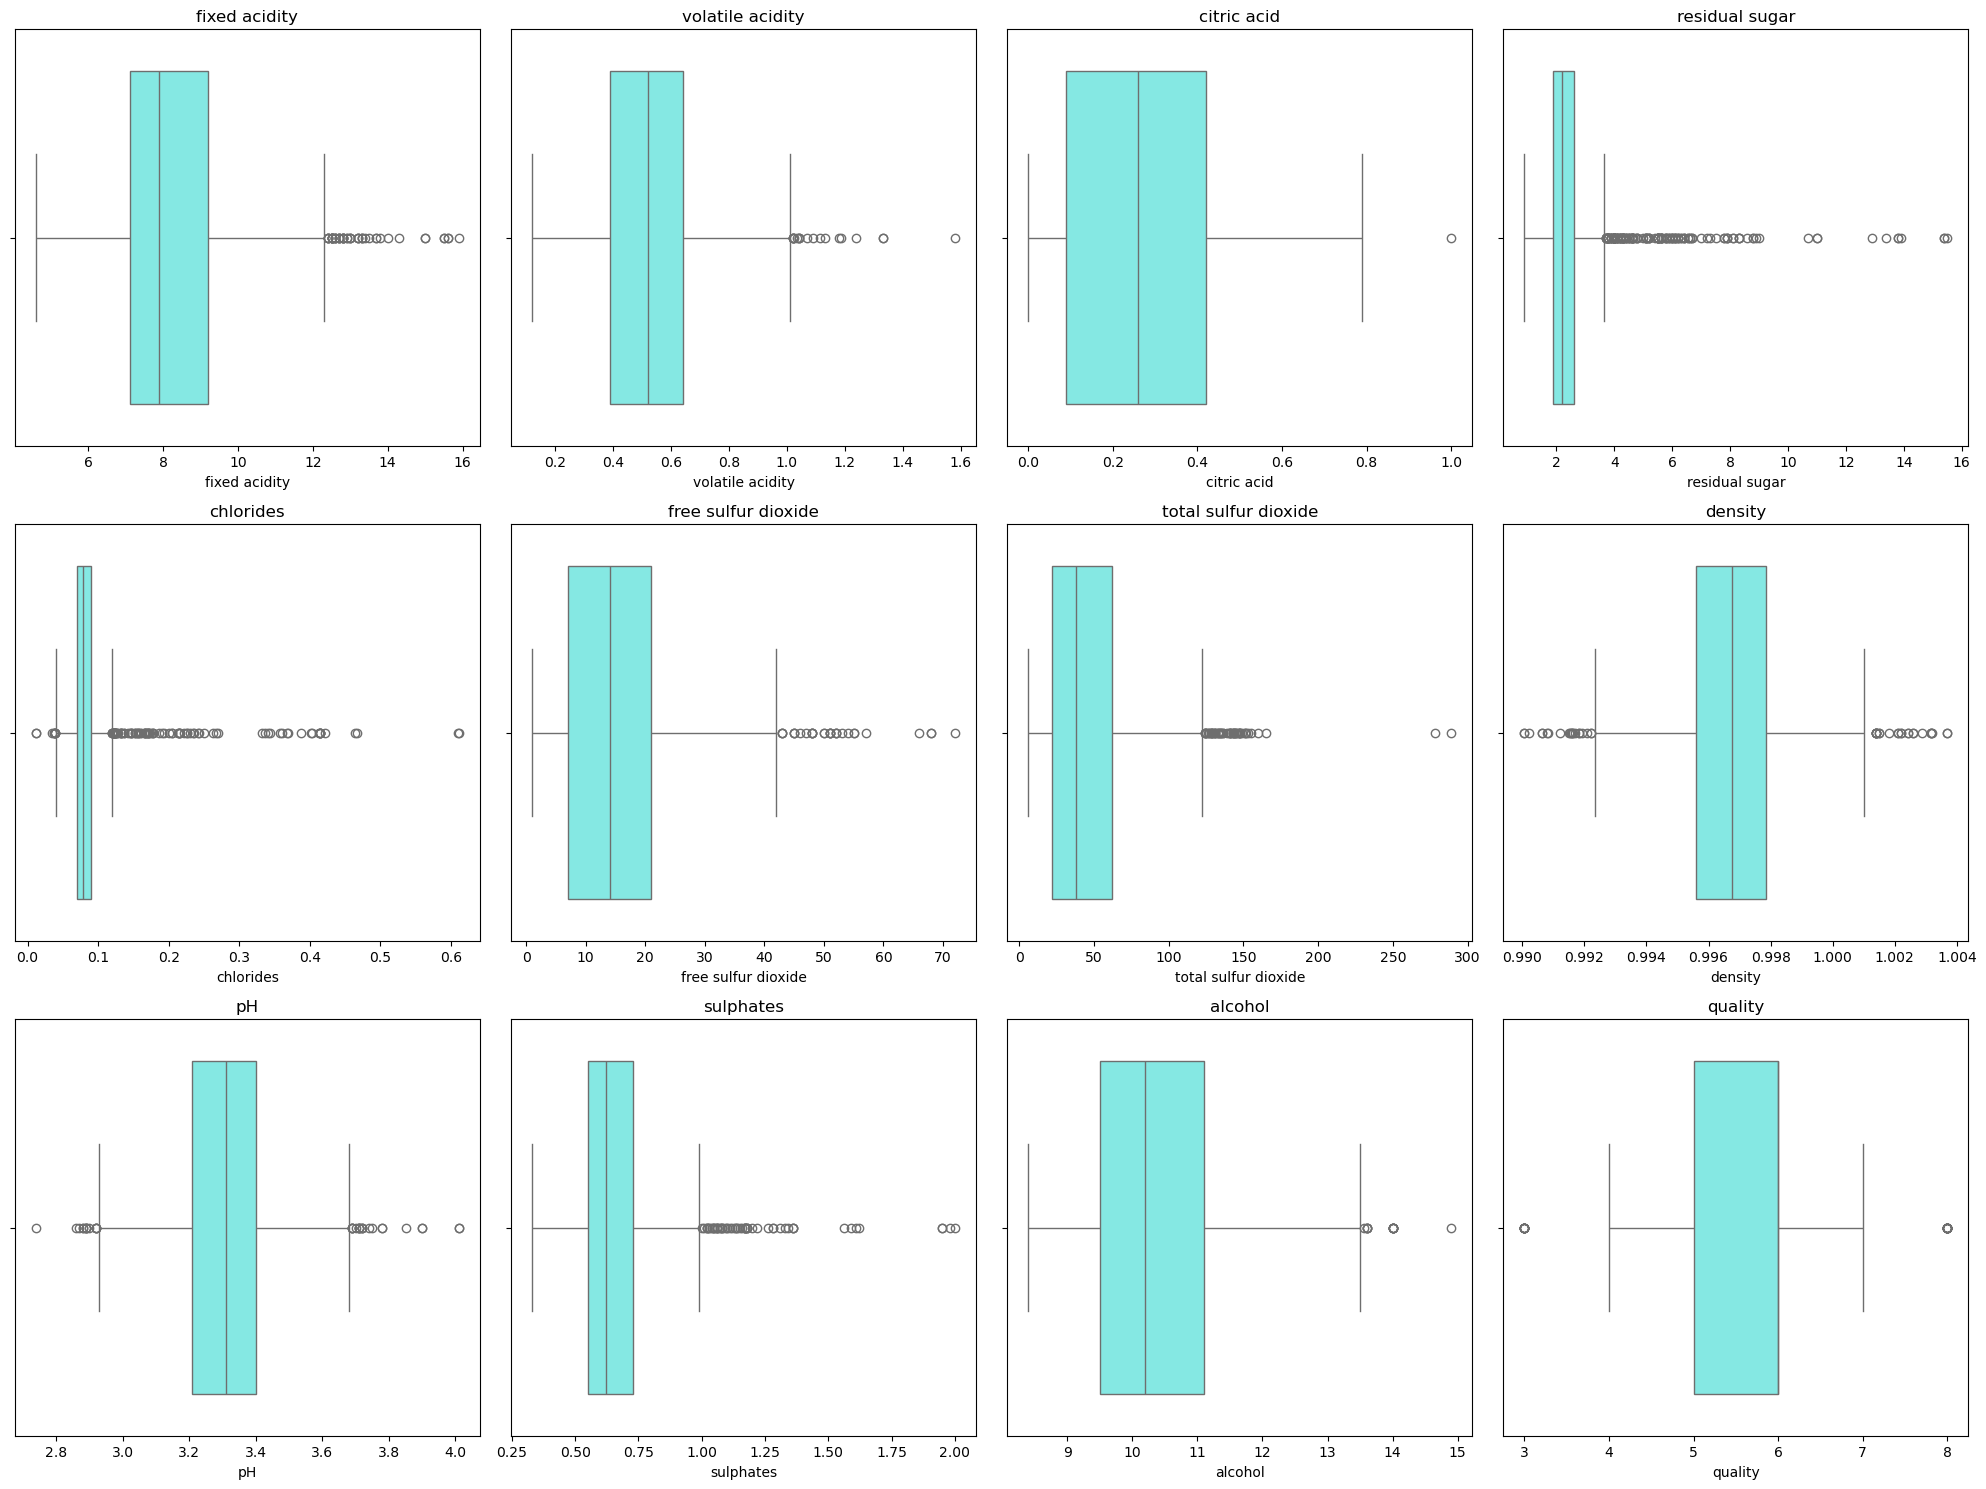

In [21]:
num_features = df.select_dtypes(include=['int64', 'float64'])
utils.plot_grafico_outliers(num_features,3,4,df)

Se encuentran 1599 filas y 12 columnas. No se verifica valores nulos, sin embargo se observan valores outliers que seran escalados para aplicar PCA.

In [23]:
#Separa el dato en X e y
X = df.drop(['quality'], axis=1)
y = df['quality']

# Escalar los datos para tener media 0 y desviación estándar 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Mostrar un resumen de los datos escalados
print("Resumen de datos escalados:")
print(f"Media por característica (aproximadamente 0): {X_scaled.mean(axis=0)[:12]}")
print(f"Desviación estándar por característica (aproximadamente 1): {X_scaled.std(axis=0)[:12]}")

Resumen de datos escalados:
Media por característica (aproximadamente 0): [ 3.55493551e-16  1.73303106e-16 -8.88733878e-17 -1.24422743e-16
  2.13296131e-16 -6.22113715e-17  4.44366939e-17 -3.47317200e-14
  2.86172309e-15  6.75437748e-16  1.06648065e-16]
Desviación estándar por característica (aproximadamente 1): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


3. Aplicación de PCA:
- Implementa PCA en el dataset para reducir la dimensionalidad. Determina cuántos componentes principales se necesitan para capturar al menos el 90% de la variabilidad de los datos.
- Visualiza el gráfico de «explained variance» para mostrar cómo cada componente principal contribuye a la variabilidad total de los datos.



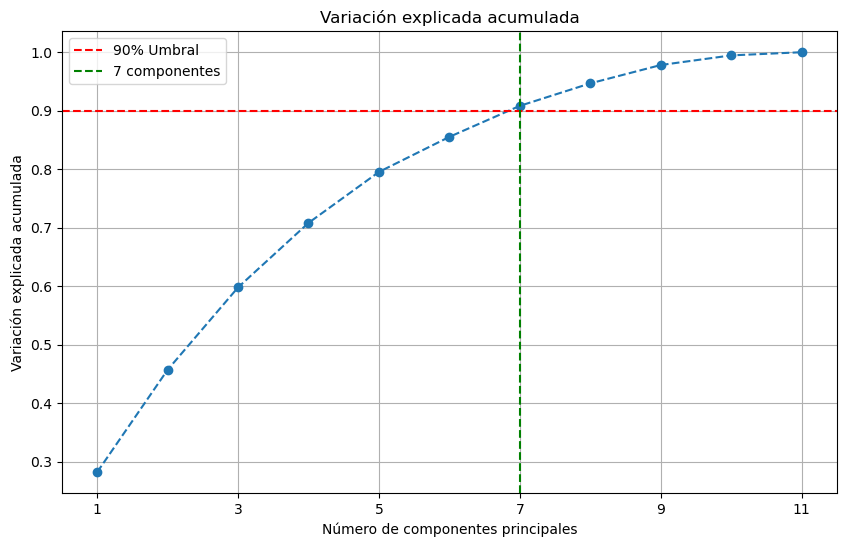

Variación explicada acumulada:
Componente 1: 28.17%
Componente 2: 45.68%
Componente 3: 59.78%
Componente 4: 70.81%
Componente 5: 79.53%
Componente 6: 85.52%
Componente 7: 90.83%
Componente 8: 94.68%
Componente 9: 97.81%
Componente 10: 99.46%
Componente 11: 100.00%


In [33]:
#aplicar PCA para todas las componentes
pca_full = PCA(n_components=11)
pca_full.fit(X_scaled)

# Variación explicada acumulada
explained_variance_cumulative = np.cumsum(pca_full.explained_variance_ratio_)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(range(1, 12), explained_variance_cumulative, marker='o', linestyle='--')
plt.title('Variación explicada acumulada')
plt.xlabel('Número de componentes principales')
plt.ylabel('Variación explicada acumulada')
plt.xticks(range(1, 12, 2))  # Mostrar solo cada dos componentes para claridad
plt.grid(True)

# Marcar el umbral del 90% como referencia
threshold = 0.9
optimal_components = np.argmax(explained_variance_cumulative >= threshold) + 1
plt.axhline(y=threshold, color='r', linestyle='--', label=f'90% Umbral')
plt.axvline(x=optimal_components, color='g', linestyle='--', label=f'{optimal_components} componentes')

plt.legend()
plt.show()

# Mostrar la varianza explicada acumulada para cada componente
print("Variación explicada acumulada:")
for i, variance in enumerate(explained_variance_cumulative, 1):
    print(f"Componente {i}: {variance:.2%}")

El numero de componentes principales que llegal al umbral de 90% de varianza acumulada es 7. Por lo tanto es el numero optimo de componentes

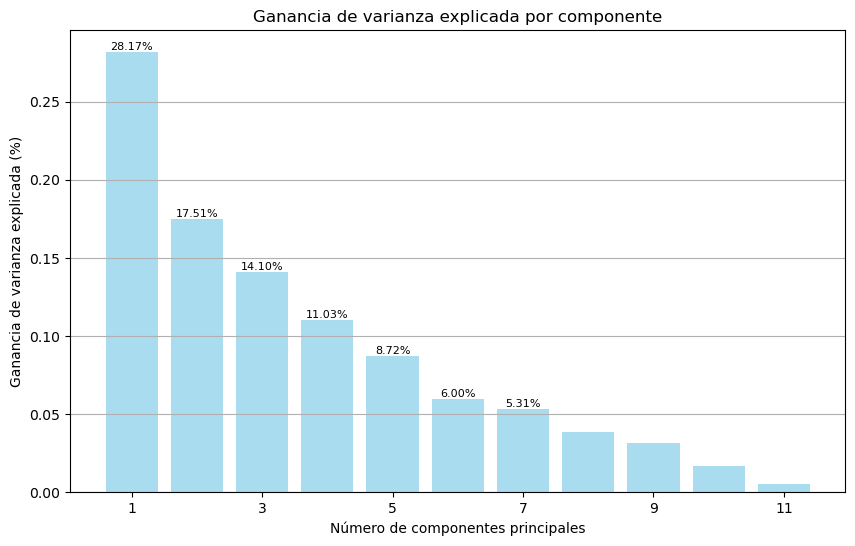

Ganancia de varianza explicada por componente:
Componente 1: 28.17%
Componente 2: 17.51%
Componente 3: 14.10%
Componente 4: 11.03%
Componente 5: 8.72%
Componente 6: 6.00%
Componente 7: 5.31%
Componente 8: 3.85%
Componente 9: 3.13%
Componente 10: 1.65%
Componente 11: 0.54%


In [36]:
explained_variance_gain = np.diff(explained_variance_cumulative, prepend=0)

# Graficar la ganancia de varianza explicada
plt.figure(figsize=(10, 6))
plt.bar(range(1, 12), explained_variance_gain, color='skyblue', alpha=0.7)
plt.title('Ganancia de varianza explicada por componente')
plt.xlabel('Número de componentes principales')
plt.ylabel('Ganancia de varianza explicada (%)')
plt.xticks(range(1, 12, 2))  # Mostrar solo cada dos componentes para claridad
plt.grid(axis='y')

# Resaltar las primeras componentes principales más significativas
threshold_gain = 0.05  # Umbral de ganancia significativa (5%)
significant_components = [i for i, gain in enumerate(explained_variance_gain, 1) if gain > threshold_gain]
for component in significant_components:
    plt.text(component, explained_variance_gain[component - 1], f"{explained_variance_gain[component - 1]:.2%}", 
            ha='center', va='bottom', fontsize=8, color='black')

plt.show()

# Mostrar las ganancias para cada componente
print("Ganancia de varianza explicada por componente:")
for i, gain in enumerate(explained_variance_gain, 1):
    print(f"Componente {i}: {gain:.2%}")


Agreganda un umbral de ganancia significativa del 5%, se puede determinar que 7 componentes pueden llegar a demostrar el 90 porciento de la varianza en los datos.

4. Interpretación de los componentes principales:
- Analiza los coeficientes de cada componente principal para identificar qué variables tienen la mayor influencia en cada uno de ellos.
- Discute cómo la reducción de dimensionalidad mediante PCA puede simplificar la construcción de modelos predictivos al eliminar redundancia en las características.



In [38]:
# Aplicar PCA con el número seleccionado de componentes
pca_final = PCA(n_components=7)
X_pca_7 = pca_final.fit_transform(X_scaled)

explained_variance = pca_final.explained_variance_ratio_
print("Varianza explicada por cada componente principal:")
print(f"Componente 1: {explained_variance[0]:.2%}")
print(f"Componente 2: {explained_variance[1]:.2%}")

# Mostrar la varianza explicada acumulada con 31 componentes
explained_variance_7 = pca_final.explained_variance_ratio_.sum()
print(f"Varianza explicada total con 7 componentes: {explained_variance_7:.2%}")

# Dimensiones transformadas
print(f"Dimensiones originales: {X_scaled.shape[1]}")
print(f"Dimensiones reducidas: {X_pca_7.shape[1]}")

Varianza explicada por cada componente principal:
Componente 1: 28.17%
Componente 2: 17.51%
Varianza explicada total con 7 componentes: 90.83%
Dimensiones originales: 11
Dimensiones reducidas: 7


- Analiza los coeficientes de cada componente principal para identificar qué variables tienen la mayor influencia en cada uno de ellos.

Se puede ver que el componente 1 captura el 28.17% y el componente 2 el 17.51 % de la variabilidad total de los datos. Lo cual representa los datos mas relevantes y de mayor peso en los datos. Sin embargo, al utilizar 7 componentes se logro capturar un total del 90.83% de la variabilidad total de los datos. Esto indica que reduciendo de 11 a 7 dimensiones se captura perfectamente el 90% de la informacion original.

- Discute cómo la reducción de dimensionalidad mediante PCA puede simplificar la construcción de modelos predictivos al eliminar redundancia en las características.

Eliminación de Redundancia:

PCA elimina la redundancia en los datos al combinar características correlacionadas en componentes que representan la variabilidad más importante. Esto significa que algunas características originales podrían ser redundantes o demasiado similares entre sí, lo que puede causar multicolinealidad en modelos predictivos. PCA ayuda a reducir este problema al usar solo las componentes que representan la mayor parte de la varianza.

Impacto en Modelos Predictivos:

Simplificación del modelo: Al trabajar con solo 7 componentes en lugar de 11, el modelo es más simple, más rápido de entrenar y requiere menos memoria.
Mejor generalización: La reducción de la dimensionalidad puede ayudar a evitar el sobreajuste (overfitting) al eliminar características irrelevantes o ruidosas, permitiendo que el modelo generalice mejor a nuevos datos.




5. Visualización y comparación:
- Visualiza los datos proyectados en los primeros dos componentes principales utilizando un gráfico de dispersión.
- Si el dataset tiene etiquetas de clase (como la calidad del vino), observa cómo se distribuyen las clases en el espacio de los componentes principales.

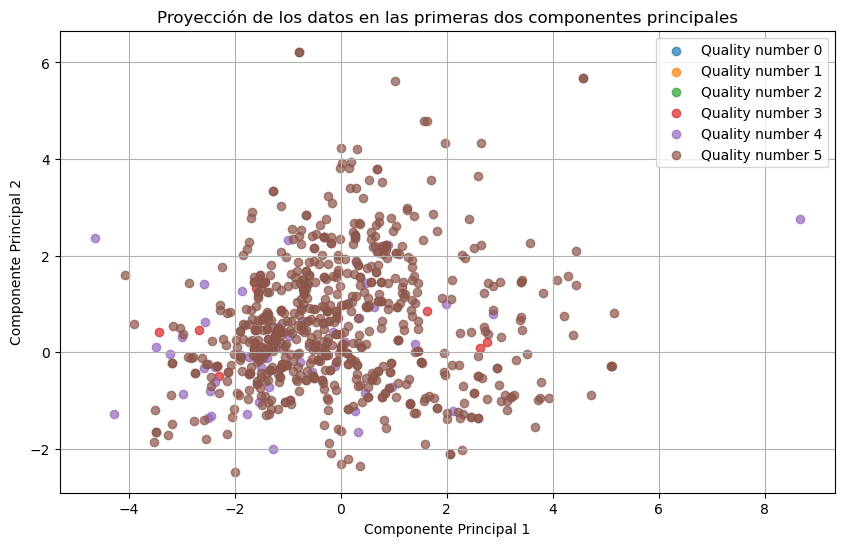

In [43]:
target_names, count = np.unique(y, return_counts=True)
plt.figure(figsize=(10, 6))
for i in range(len(target_names)):
    subset = X_pca_7[y == i][:, :2]  # Usar solo las primeras 2 componentes
    plt.scatter(subset[:, 0], subset[:, 1], label=f'Quality number {i}', alpha=0.7)

plt.title('Proyección de los datos en las primeras dos componentes principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.show()

Para los dos primeros componentes principales se puede observar que hay una dominacion del quality number 5 por sobre los demas targets. Sin embargo, es posible que los otros valores (por ejemplo, "Quality 0", "Quality 1", etc.) estén presentes pero en una región diferente del gráfico, posiblemente más alejada o en una zona que no se muestra claramente debido a la escala de los ejes.